# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [565]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [566]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [567]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [568]:
# Your code here:

def numeric_value(x):
    
    '''
    This function strips all non-numeric characters from each cell 
    and transforms them into numeric (float)
    '''
    
    amount = x.replace('€', '')
    
    # Changing the milions (M) for 1000000's
    if 'M' in amount:
        amount = amount.replace('M', '')
        amount = float(amount)*1000000

    # Changing the thousands (K) for 1000's
    elif 'K' in amount:
        amount = amount.replace('K', '')
        amount = float(amount)*1000
    return float(amount)

In [569]:
fifa['ValueNumeric'] =  fifa['Value'].apply(numeric_value)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [570]:
# Your code here:

# ANOVA is used when one wants to compare the means of a condition between 2+ groups
# In this case, we will compare the Preferred Foot and Position

In [571]:
# Determine whether a player's preffered foot has an impact on their value
formula = 'ValueNumeric ~C(fifa["Preferred Foot"])'

# Fit regression model 
model = ols(formula=formula, data=fifa).fit()

# Anova table for one or more fitted linear models
table_foot = sm.stats.anova_lm(model, typ=2)

table_foot

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",1.609973e+14,1.0,5.132594,0.023492
Residual,5.695422e+17,18157.0,NaN,NaN


In [572]:
# Determine whether a player's position has an impact on their value
formula = 'ValueNumeric ~C(fifa["Position"])'

# Fit regression model 
model = ols(formula=formula, data=fifa).fit()

# Anova table for one or more fitted linear models
table_position = sm.stats.anova_lm(model, typ=2)

table_position

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",1.649609e+16,26.0,20.784194,5.517758e-96
Residual,5.531370e+17,18120.0,NaN,NaN


What is your conclusion from this ANOVA?

In [573]:
# Your conclusions here:

print(table_foot['PR(>F)'][0] < 0.05)

# The p-value for Preferred foot is smaller than 0.05 so we can reject H0
# Preffered foot is statistically significant and the player's value might be affected by his preferred foot

print(table_position['PR(>F)'][0] < 0.05)

# The p-value for Position is smaller than 0.05 so we can reject H0
# Position is statistically significant and the player's value might be affected by his position

True
True


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [574]:
# Your code here:

# Determine whether a player's nationality has an impact on their value
formula = 'ValueNumeric ~C(fifa["Nationality"])'

# Fit regression model 
model = ols(formula=formula, data=fifa).fit()

# Anova table for one or more fitted linear models
table_nationality = sm.stats.anova_lm(model, typ=2)

table_nationality

,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [575]:
print(table_nationality['PR(>F)'][0] < 0.05)

# The p-value for Nationality is smaller than 0.05 so we can reject H0
# Nationality is statistically significant and the player's value might be affected by his nationality

True


# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [576]:
# Your code here:

fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [577]:
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [578]:
# Your code here:

# Creating a linear model predicting value using stamina and sprint speed
X = fifa[["Stamina", "SprintSpeed"]] 
y = fifa["ValueNumeric"]

# adding an intercept to our model
X = sm.add_constant(X) 

# Fit regression model
model = sm.OLS(y, X).fit() 
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          8.04e-193
Time:                        22:32:44   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      0.000   -3.46e+06   -2.68e+06
Stamina      6.037e+04   3290.118     18.349      0.000    5.39e+04    6.68e+04
SprintSpeed  2.631e+04   3565.332      7.380      0.000    1.93e+04    3.33e+04
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [579]:
# Your conclusions here:

# Whereas correlation explains the strength of the relationship between an independent and dependent variable, 
# R-squared explains to what extent the variance of one variable explains the variance of the second

# In this model R2 = 0.048, so Stamina and SprintSpeed explain about 5% of the Value of each player

# Since pvalue (453.4) > 0.05: we cannot conclude that a significant difference exists. 
# There is no significant effect of Stamina and SprintSpeed in the player's value

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [580]:
# Your code here:

# Creating a linear model predicting value using potential
X = fifa["Potential"]
y = fifa["ValueNumeric"]

# adding an intercept to our model
X = sm.add_constant(X) 

# Fit regression model
model = sm.OLS(y, X).fit() 
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:32:44   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.000   -3.62e+07   -3.47e+07
Potential   5.312e+05   5581.083     95.172      0.000     5.2e+05    5.42e+05
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [581]:
# Your conclusions here:

# In this model R2 = 0.336, so Potential explains about 34% of the Value of each player

# Since pvalue (9058) > 0.05: we cannot conclude that a significant difference exists. 
# there is no significant effect of Potential in the player's value

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

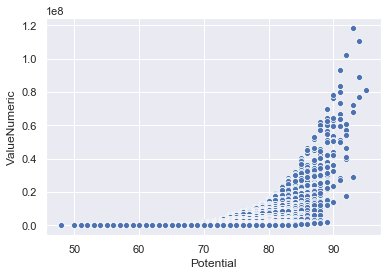

In [582]:
# Your code here:
sns.scatterplot(fifa['Potential'], fifa['ValueNumeric'])

In [583]:
X = fifa['Potential']
Y = fifa['ValueNumeric']

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)
pred_y = slope * X + intercept

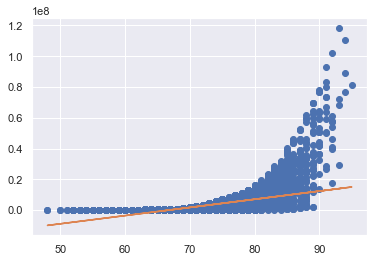

In [584]:
plt.plot(X, Y, 'o')
plt.plot(X, predict_y)
plt.show()

In [585]:
def curva(x, a, b, c):
    return a + b * x + c * x**2

In [586]:
from scipy.optimize import curve_fit
params, params_covariance = curve_fit(curva, x, y)

In [587]:
print(min(fifa['Potential']))
print(max(fifa['Potential']))

48
95


Text(0.5, 1.0, 'Potential vs Value')

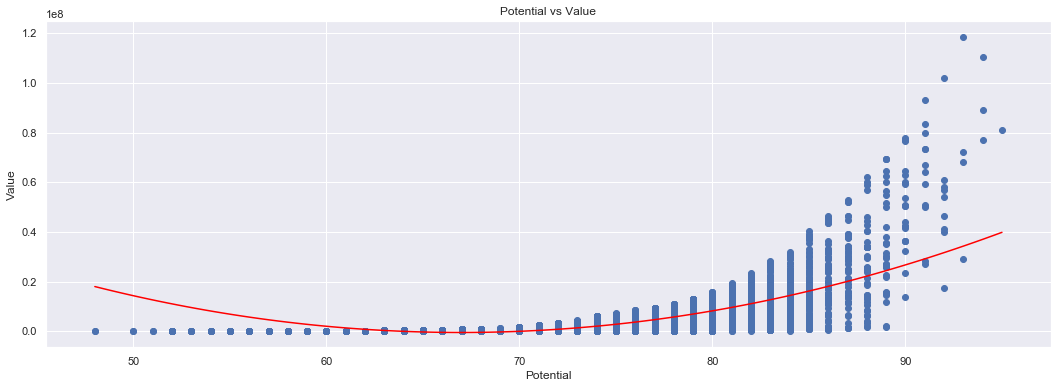

In [588]:
x_1 = np.linspace(48,95,100)

fig= plt.figure(figsize=(18,6))
plt.plot(x_1, curva(x_1, params[0], params[1], params[2]), c='red')
plt.scatter(x,y)
plt.xlabel('Potential')
plt.ylabel('Value')
plt.title('Potential vs Value')

In [589]:
# There seems to be a linear relationship between Potential and Value starting from 70 points
# Since Potential explains about 34% of the Value of each player, this relationship is not clear in the scatter